# sets up

In [1]:
import pint

In [2]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot

In [3]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs
from metpy.units import units
import metpy.calc as mpcalc

In [4]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from __future__ import unicode_literals

In [5]:
from AdvisorMao_ import *

In [84]:
sys.path.append('/portal1/dell/GitHub/sanctuary/')
from plot.auto_cbar import fromFigToColorBar
new_c,_ = fromFigToColorBar('202f64e207e5e64311f7ee98927ded7.png',10,-1,inputPcs=5)

In [6]:
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['#030390','#3636c3','w','#ff8d19','#800000']
newcmp = LinearSegmentedColormap.from_list('chaos',clist)

In [7]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
shp2='/portal3/gis/Global_countries/world_map_latest/World_Countries__Generalized_.shp'
shp4='/portal3/gis/Mekong_Delta/mekong_river.shp'

In [8]:
### matplotlib setups
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5
cmap = cm.get_cmap('RdBu_r')

## calculate dyna and ther ano

In [9]:
ds = xr.open_mfdataset("dyna_and_ther/*.nc")

In [10]:
ds_y = ds.resample(time='Y').mean(skipna=False)
ds_19 =ds_y.sel(time=ds_y.time[60])
ds_m = ds_y.mean('time')

### get distance of each grid

In [11]:
lon1=np.linspace(80.00,120,162)
lat1=np.linspace(40,0,161)
dx1, dy1 = mpcalc.lat_lon_grid_deltas(lon1, lat1)
lon2=np.linspace(80.00,120,161)
lat2=np.linspace(40,0,162)
dx2, dy2 = mpcalc.lat_lon_grid_deltas(lon2, lat2)

In [12]:
dy2.shape

(161, 161)

## get Q in 2019 and mean

In [13]:
q19 = ds_19.q.values
v19 = ds_19.v.values
u19 = ds_19.u.values

In [70]:
g = 9.8
a = np.full((161,161),0)
pa = [9164,7185,5574,4206,3012,1457,760,111]
for i in range(0,7):
    q = q19[i]
    v = v19[i]
    u = u19[i]

    q1 = q19[i+1]
    v1 = v19[i+1]
    u1 = u19[i+1]
    
    V = np.sqrt((v)**2+(u)**2)
    V1 = np.sqrt((v1)**2+(u1)**2)

    Q = ((q*V)+(q_1*V1)*(pa[i]-pa[i+1]))/2/9.8
    a = a+Q

print(a)

[[14.32863411 14.11411357 13.85368875 ... 34.28961833 35.95211229
  36.23267016]
 [13.77258639 13.64641714 13.50230435 ... 35.72445676 35.50849146
  35.44750428]
 [13.1549447  13.07640095 12.9697548  ... 35.75933915 35.99247408
  36.07089436]
 ...
 [22.50091925 22.63158381 22.74685493 ... 32.89879215 32.73511899
  31.44087178]
 [21.91821671 22.05938417 22.15258998 ... 32.07580197 31.74665034
  31.13982478]
 [21.55153811 21.67885274 21.74533689 ... 31.66075099 31.76563859
  31.79374355]]


In [15]:
ds_m

<xarray.Dataset>
Dimensions:    (latitude: 161, level: 8, longitude: 161)
Coordinates:
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * level      (level) int32 300 400 500 600 700 850 925 1000
Data variables:
    q          (level, latitude, longitude) float32 dask.array<chunksize=(8, 161, 161), meta=np.ndarray>
    u          (level, latitude, longitude) float32 dask.array<chunksize=(8, 161, 161), meta=np.ndarray>
    v          (level, latitude, longitude) float32 dask.array<chunksize=(8, 161, 161), meta=np.ndarray>

In [19]:
qm = ds_m.q.values

In [21]:
vm = ds_m.v.values

In [22]:
um = ds_m.u.values

In [33]:
qm.shape

(8, 161, 161)

In [62]:
g = 9.8
am = np.full((161,161),0)
pa = [9164,7185,5574,4206,3012,1457,760,111]
for i in range(0,7):
    q_ = qm[i]
    v_ = vm[i]
    u_ = um[i]
    
    q_1 = qm[i+1]
    v_1 = vm[i+1]
    u_1 = um[i+1]
    
    V = np.sqrt((v_)**2+(u_)**2)
    V1 = np.sqrt((v_1)**2+(u_1)**2)

    Q = ((q_*V)+(q_1*V1)*(pa[i]-pa[i+1]))/2/9.8
    am = am+Q
print(am)

[[ 5.54188722  5.35539553  5.19146049 ...  7.37376634  7.42229292
   7.51024911]
 [ 5.14381212  5.06390816  5.01966915 ...  7.35722172  7.44972998
   7.49907321]
 [ 4.86911705  4.83718744  4.81899753 ...  7.33129331  7.4026413
   7.4050079 ]
 ...
 [15.684983   15.76288982 15.81987643 ...  7.02299717  7.01617002
   6.50111198]
 [14.9942424  15.06413993 15.10896507 ...  6.58750176  6.5512394
   6.19433674]
 [14.28823033 14.36041465 14.4131645  ...  6.35708293  6.45850512
   6.50396436]]


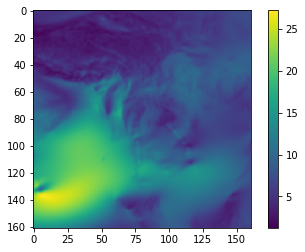

In [65]:
plt.imshow(am)
plt.colorbar()

In [60]:
am.shape

(161, 161)

## plot Q mean

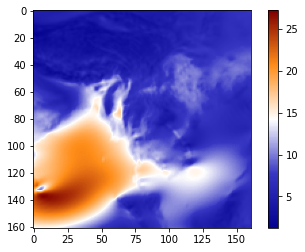

In [66]:
im = plt.imshow(am, cmap=cm.get_cmap(newcmp,8))
plt.colorbar(im)
plt.show()

## plot Q ano2019

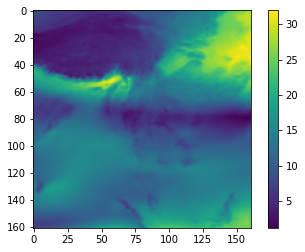

In [73]:
ano19 = a-am
im = plt.imshow(ano19, )
plt.colorbar(im)
plt.show()

## calculate dynamic component 

In [76]:
V  = np.sqrt((v/dx1)**2+(u/dy2)**2)

In [117]:
g = 9.8
dyna = np.full((161,161),0)
pa = [9164,7185,5574,4206,3012,1457,650,111]
for i in range(0,7):
    
    
    q = q19[i]
    v = v19[i]
    u = u19[i]
    
    q1 = q19[i+1]
    v1 = v19[i+1]
    u1 = u19[i+1]
    
    qc = qm[i]
    vc = vm[i]
    uc = um[i]
    
    qc1 = qm[i+1]
    vc1 = vm[i+1]
    uc1 = um[i+1]
    
    qa = q - qc
    qa1 = q1-qc1
    
    V19  = np.sqrt((v/dx1)**2+(u/dy2)**2)
    V191  = np.sqrt((v1/dx1)**2+(u1/dy2)**2)
    
    Vc = np.sqrt((vc/dx1)**2+(uc/dy2)**2)
    Vc1 = np.sqrt((vc1/dx1)**2+(uc1/dy2)**2)
    
    
    D = ((qc*(V19-Vc))+(qc1*(V191-Vc1)))*(pa[i]-pa[i+1])/2/g
    
    #D = (q*(v/dx1-vc/dx1))*(pa[i+1]-pa[i])*100*86400/g+(q*(u/dy1-uc/dy1))*(pa[i+1]-pa[i])*100*86400/g
    dyna = dyna+D
print(dyna)

[[-5.594412576010534e-05 -5.433219836351437e-05 -5.201799022983983e-05  ... -1.5935848625727293e-05 -1.8297336388418976e-05  -2.0016360878463624e-05] [-5.245411918472746e-05 -4.977659896120911e-05 -4.744010285052903e-05  ... -1.6617556153630697e-05 -1.7810727857003903e-05  -1.8860621056371253e-05] [-4.233417719058682e-05 -4.078385872163633e-05 -3.956147594619665e-05  ... -1.7183508465692945e-05 -1.781976189537522e-05  -1.8867771214978812e-05] ... [-0.00040859795165385437 -0.000409336459163109 -0.0004097385250482571  ... 0.00011240059455433463 0.00010793792852769384 9.885156967782434e-05] [-0.0003945812602490055 -0.00039439968287034326 -0.0003940996491428445  ... 0.00010889013152651218 0.00010956845902104769  0.00010349891882526829] [-0.00037485647332555086 -0.00037415531608316234 -0.0003741978251638332  ... 0.00010061630315016968 0.00010259691341187296 9.952513254902706e-05]] / meter


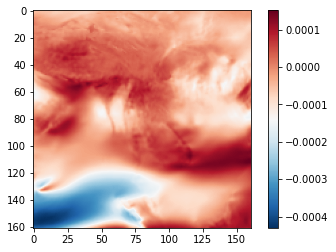

In [118]:
im = plt.imshow(dyna, cmap='RdBu_r')
plt.colorbar(im)
plt.show()

In [119]:
ds_19dyna = xr.Dataset({'dyna': (['lat', 'lon'], dyna*1000)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude)})

## plot dynamic component

In [132]:
new_c,_ = fromFigToColorBar('202f64e207e5e64311f7ee98927ded7.png',-1,reverse=True,inputPcs=10)

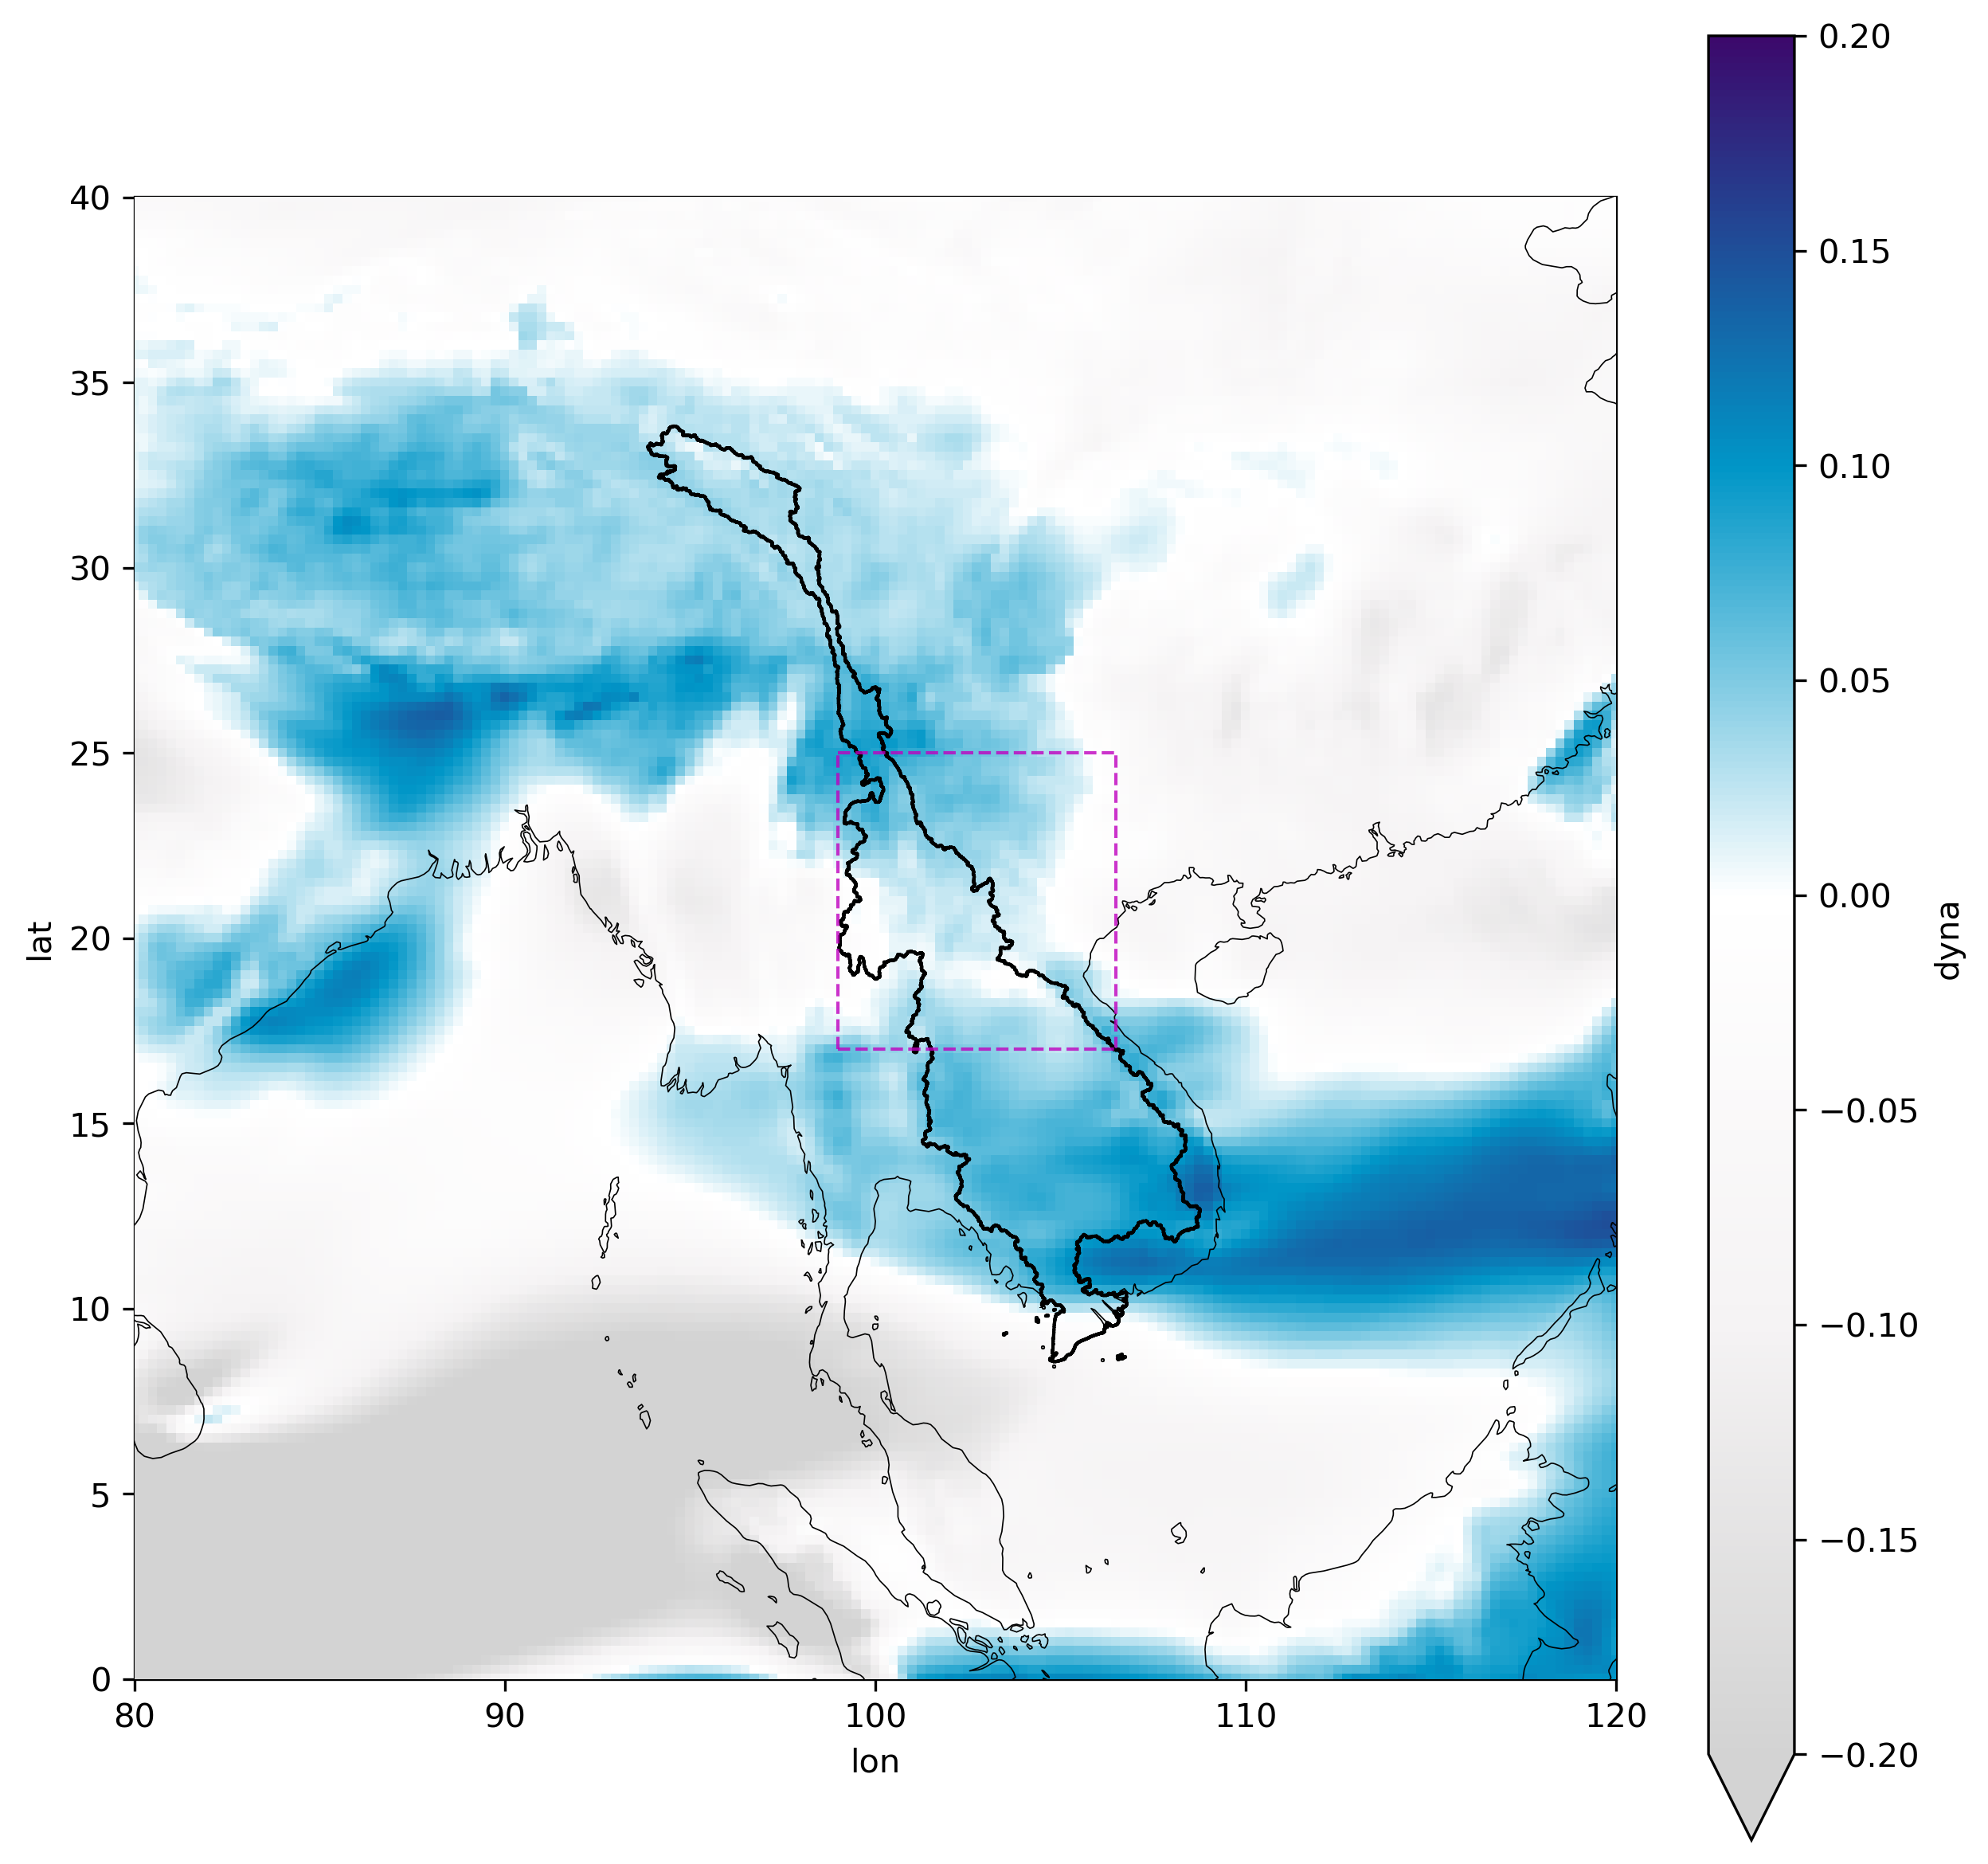

In [174]:
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['#d3d3d3','#f5f3f4',
       '#FFFFFF',
       '#0096c7','#3c096c']
newcmp1 = LinearSegmentedColormap.from_list('chaos',clist)

# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=300)
# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
#                  linewidth=0.1, color='black', alpha=0.3,zorder=3)

# x label and tick
ax.set_xticks(np.linspace(-180, 180, 37))
ax.set_ylabel('Latitude',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))
ax.set_xlabel('Longitude',fontsize=10)


# set extent area
extent = [80, 120, 0, 38.26]
ax.set_extent(extent)


# feature and mask
#ax.add_feature(cfeature.OCEAN, facecolor='w',alpha=1,zorder=3)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='k', linewidth=0.4,alpha=1,zorder=5)

ds_19dyna.dyna.plot(transform=ccrs.PlateCarree(),zorder=4,cmap=newcmp1,vmax=0.2,vmin=-0.2)

ax = stack_shp(ax,  shp, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=6)


ax.plot([99,99], [17,25], '--',color='m',alpha=0.8,lw=1, transform=ccrs.PlateCarree(),zorder=7)
ax.plot([106.5,106.5], [17,25], '--',color='m',alpha=0.8,lw=1, transform=ccrs.PlateCarree(),zorder=6)
ax.plot([99,106.5], [17,17], '--', color='m',alpha=0.8,lw=1, transform=ccrs.PlateCarree(),zorder=8)
ax.plot([99,106.5], [25,25], '--',color='m',alpha=0.8,lw=1, transform=ccrs.PlateCarree(),zorder=9)



plt.savefig('dyna2019.pdf')
plt.show() 




## calculate ther component

In [167]:
g = 9.8
ther = np.full((161,161),0)
pa = [9164,7185,5574,4206,3012,1457,650,111]
for i in range(0,7):
    
    
    q = q19[i]
    v = v19[i]
    u = u19[i]
    
    q1 = q19[i+1]
    v1 = v19[i+1]
    u1 = u19[i+1]
    
    qc = qm[i]
    vc = vm[i]
    uc = um[i]
    
    qc1 = qm[i+1]
    vc1 = vm[i+1]
    uc1 = um[i+1]
    
    qa = q - qc
    qa1 = q1-qc1
    
    Vc = np.sqrt((vc/dx1)**2+(uc/dy2)**2)
    Vc1 = np.sqrt((vc1/dx1)**2+(uc1/dy2)**2)
    T = (((q-qc)*Vc)+((q1-qc1)*Vc1))*(pa[i+1]-pa[i])/g/2
    

    ther = ther+T
print(ther)

[[-3.237958050355789e-06 -2.6734582634270933e-06 -2.98939711664093e-06  ... 1.8979948355189676e-05 1.8979691227418923e-05  1.9149446646008094e-05] [-2.939957183235244e-06 -3.19249070671221e-06 -3.769138065883887e-06 ...  2.195105891070995e-05 2.1996680075451422e-05 2.2315185710939518e-05] [-2.973376523546343e-06 -3.0308630510881583e-06 -3.2196499152620177e-06  ... 2.4721126154298223e-05 2.4949856499331407e-05 2.552133150317347e-05] ... [-1.88717997225814e-05 -1.770418030082467e-05 -1.6412824988014523e-05  ... 1.851618206347804e-05 1.7302545239983667e-05 1.539021904118452e-05] [-1.4093309665259576e-05 -1.3093403902293159e-05 -1.1973566170894271e-05  ... 1.766545253437475e-05 1.657166987323778e-05 1.4910819863483296e-05] [-9.080556216835854e-06 -8.127682142386643e-06 -7.548279121679464e-06  ... 1.681945058840365e-05 1.6091672510121602e-05 1.5503924164570985e-05]] / meter


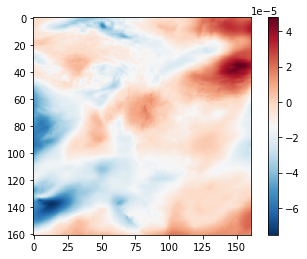

In [135]:
im = plt.imshow(ther, cmap='RdBu_r')
plt.colorbar(im)
plt.show()

In [172]:
ds_19ther = xr.Dataset({'ther': (['lat', 'lon'], ther*1000)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude)})

## plot ther component

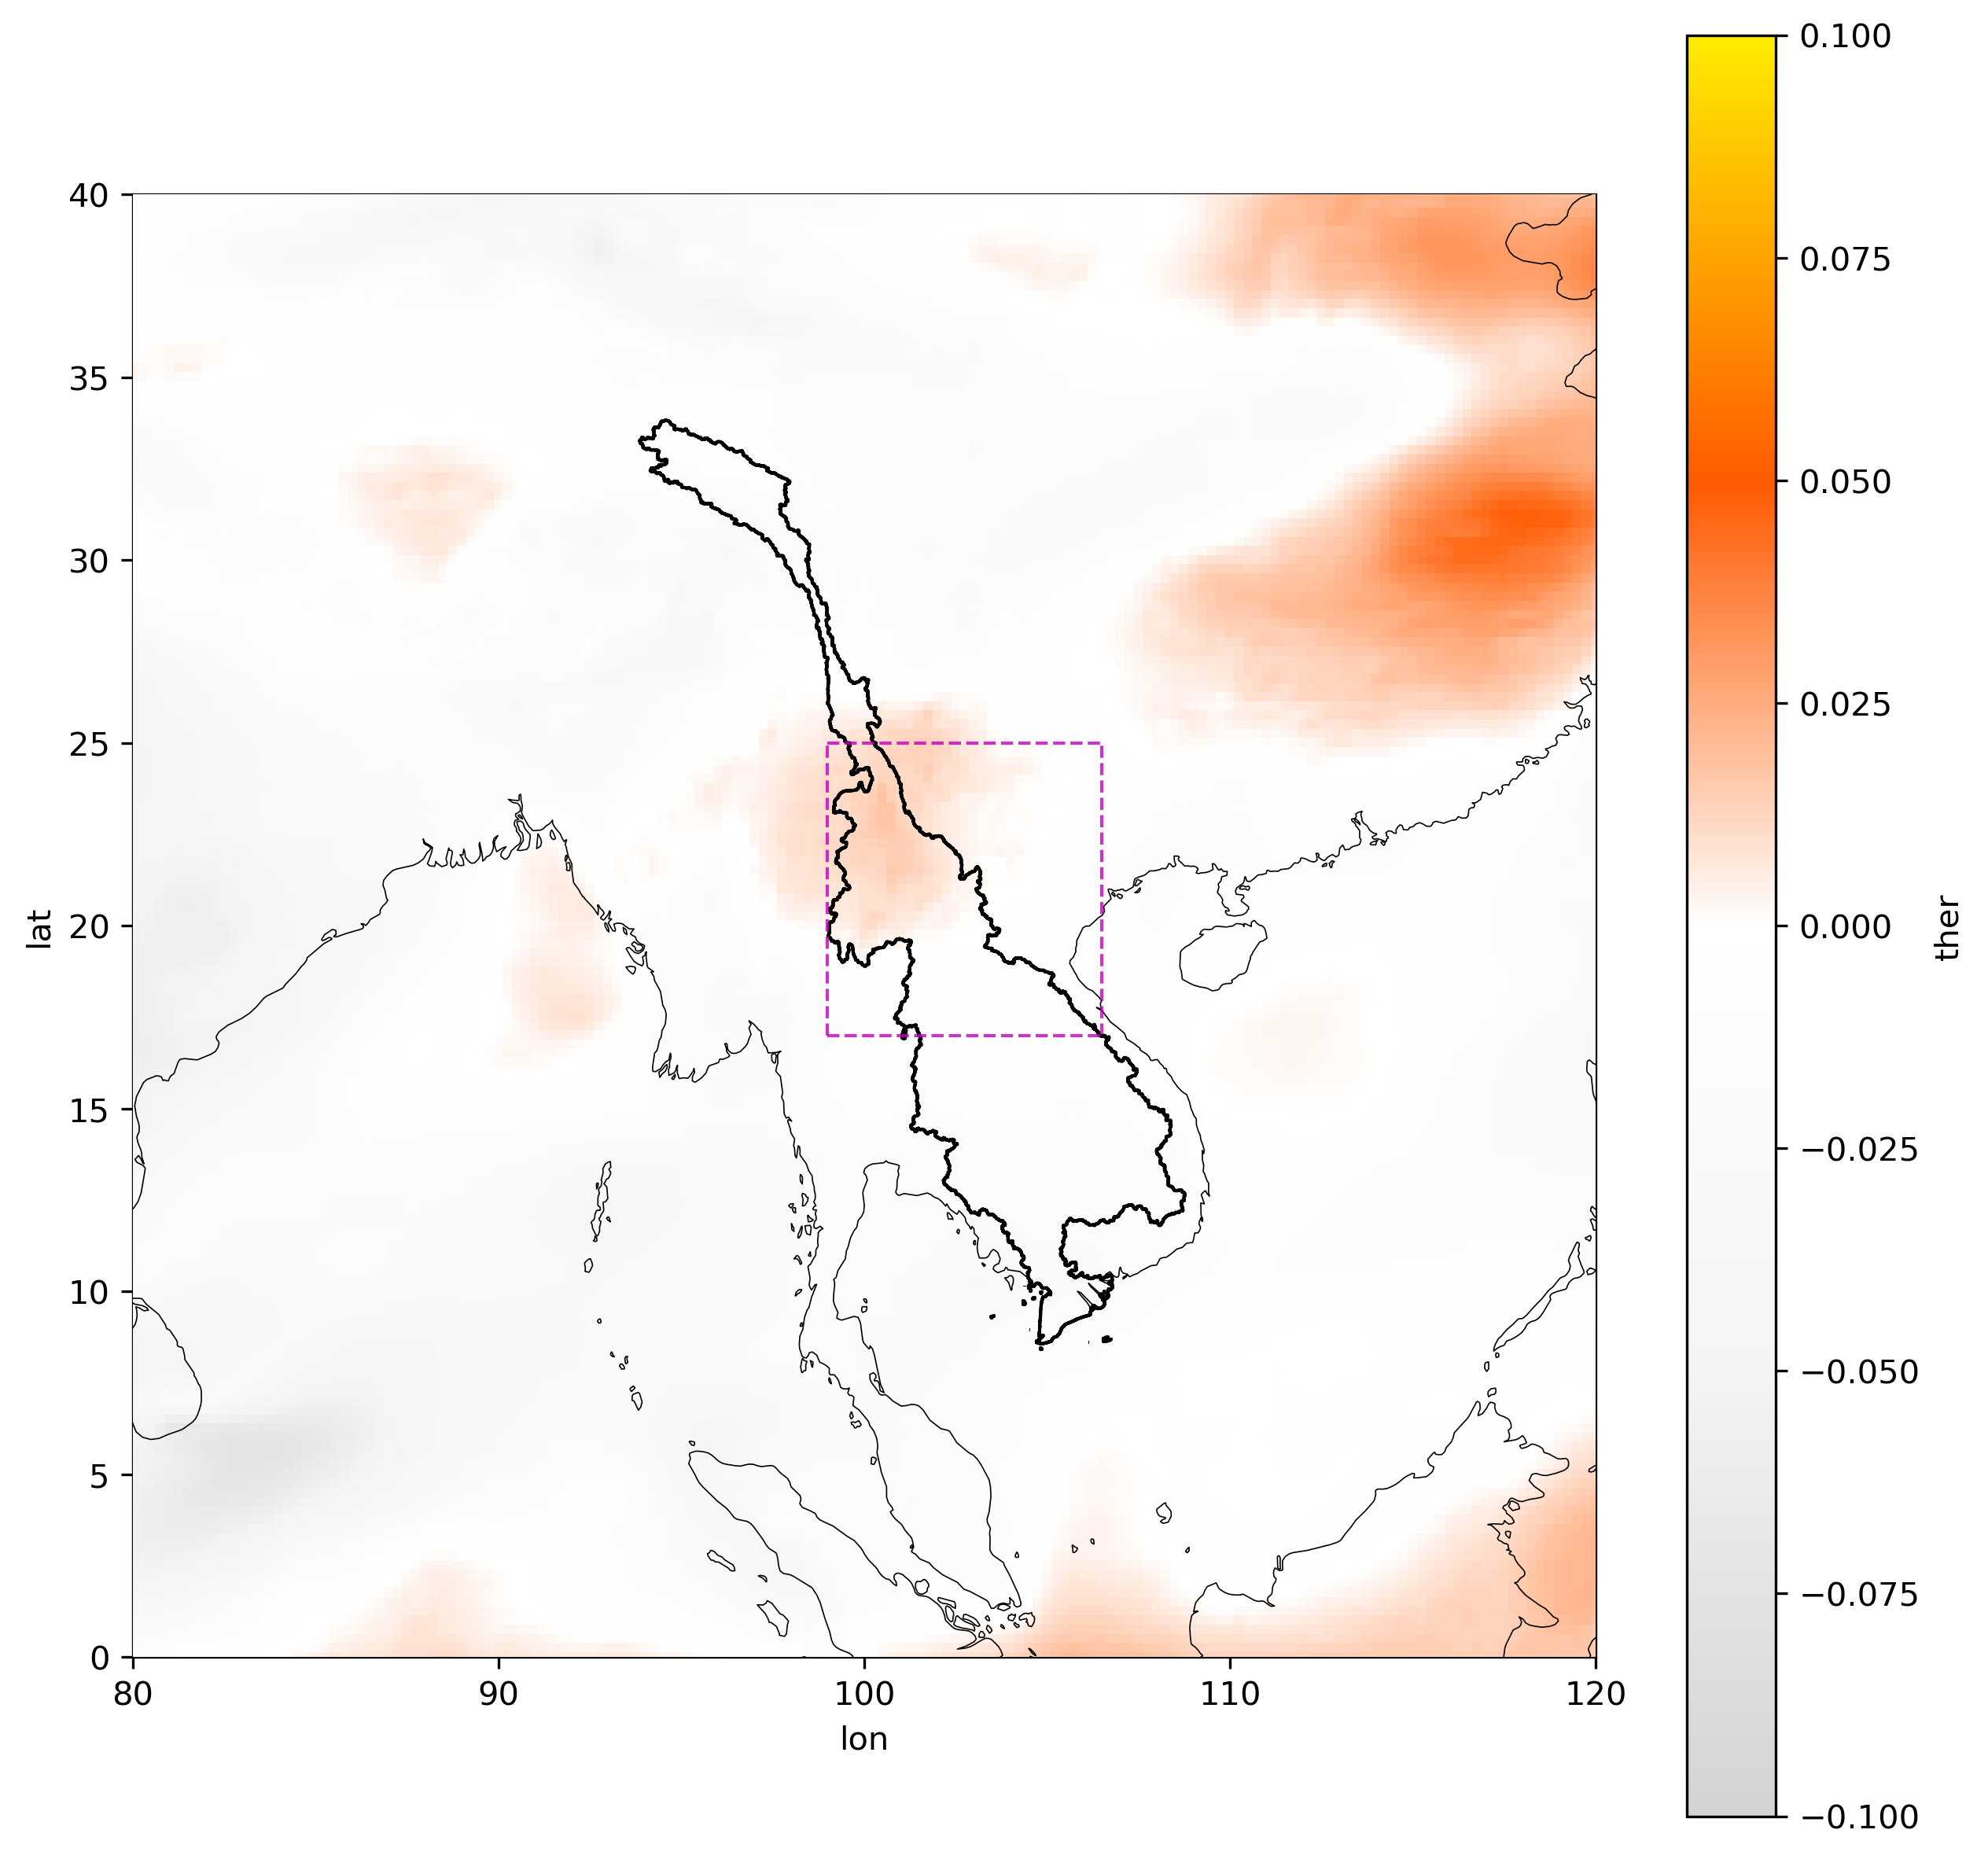

In [175]:
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['#d3d3d3','#f5f3f4',
       '#FFFFFF',
       '#ff5a00','#ffeb00']
newcmp2 = LinearSegmentedColormap.from_list('chaos',clist)

# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=300)
# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
#                  linewidth=0.1, color='black', alpha=0.3,zorder=3)

# x label and tick
ax.set_xticks(np.linspace(-180, 180, 37))
ax.set_ylabel('Latitude',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))
ax.set_xlabel('Longitude',fontsize=10)


# set extent area
extent = [80, 120, 0, 38.26]
ax.set_extent(extent)


# feature and mask
#ax.add_feature(cfeature.OCEAN, facecolor='w',alpha=1,zorder=3)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='k', linewidth=0.4,alpha=1,zorder=5)

ds_19ther.ther.plot(transform=ccrs.PlateCarree(),zorder=4,cmap=newcmp2,vmax=0.1,vmin=-0.1)

ax = stack_shp(ax,  shp, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=6)


ax.plot([99,99], [17,25], '--',color='m',alpha=0.8,lw=1, transform=ccrs.PlateCarree(),zorder=7)
ax.plot([106.5,106.5], [17,25], '--',color='m',alpha=0.8,lw=1, transform=ccrs.PlateCarree(),zorder=6)
ax.plot([99,106.5], [17,17], '--', color='m',alpha=0.8,lw=1, transform=ccrs.PlateCarree(),zorder=8)
ax.plot([99,106.5], [25,25], '--',color='m',alpha=0.8,lw=1, transform=ccrs.PlateCarree(),zorder=9)



plt.savefig('ther2019.pdf')
plt.show() 

# qualify dyna and ther 

26.561841066180957

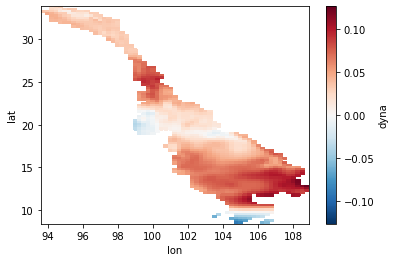

In [138]:
ds_19dyna
#slice shpfile and save as ds_bw_mk

ds_bw_mk_d,_ = ncslice(ds_19dyna,shp,18,index='LEGEND')
ds_bw_mk_d.dyna.plot(cmap='RdBu_r')
plt.rcParams["figure.figsize"] = (5,6)

ddd = ds_bw_mk_d.sel(lat=ds_bw_mk_d.lat[35:68])    # select study region
dyna_mid = np.nanmean(ddd.dyna.values)
dyna_mid*1000

2.8047136528148435

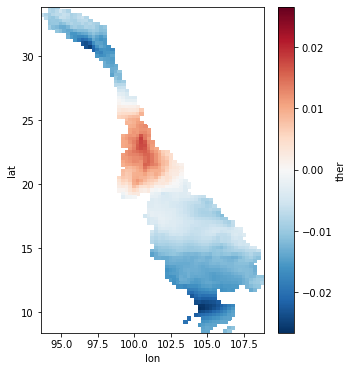

In [139]:
ds_19ther
#slice shpfile and save as ds_bw_mk

ds_bw_mk_t,_ = ncslice(ds_19ther,shp,18,index='LEGEND')
ds_bw_mk_t.ther.plot(cmap='RdBu_r')
plt.rcParams["figure.figsize"] = (5,6)

ttt = ds_bw_mk_t.sel(lat=ds_bw_mk_t.lat[35:68])    # select study region
ther_mid = np.nanmean(ttt.ther.values)
ther_mid*1000

## calculate how many times dyna/ther

In [140]:
dyna_mid/ther_mid

9.470428840221597

# height and flux

In [141]:
dfwm= pd.read_csv('../../watervapor_flux_divergence/wmiddle.csv')
dfem = pd.read_csv('../../watervapor_flux_divergence/emiddle.csv')
dfnm = pd.read_csv('../../watervapor_flux_divergence/nmiddle.csv')
dfsm = pd.read_csv('../../watervapor_flux_divergence/smiddle.csv')

### mean in and out

In [142]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = qm[i]
    v_ = vm[i]
    u_ = um[i]

    
    
    

    Qe = q_*u_*(pa[i+1]-pa[i])*100/9.8
    Qn = q_*v_*(pa[i+1]-pa[i])*100/9.8
    ame = ame+Qe
    amn = amn+Qn
    dsh = xr.Dataset({'p71.162': (['lat', 'lon'], ame),'p72.162': (['lat', 'lon'], amn)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    westf = xr.DataArray(0)
    southf = xr.DataArray(0)
    for i in range(0,35):
        westf = dsh['p71.162'].sel(lat=dfwm['lat'][i],
                                       lon=dfwm['lon'][i])+westf
    for j in range(0,38):
        southf = dsh['p72.162'].sel(lat=dfsm['lat'][j],
                                       lon=dfsm['lon'][j])+southf
    fttin = np.sqrt((westf.values*28000/10**6)**2+(southf.values*28000/10**6)**2)
    print(fttin)

0.9281289391248504
0.8882666824532404
7.146278114985139
16.67708947848037
29.92094781324211
44.45482946726798
20.70201429377156
9.314430085732491


In [143]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = qm[i]
    v_ = vm[i]
    u_ = um[i]

    
    
    

    Qe = q_*u_*(pa[i+1]-pa[i])*100/9.8
    Qn = q_*v_*(pa[i+1]-pa[i])*100/9.8
    ame = ame+Qe
    amn = amn+Qn
    dsh = xr.Dataset({'p71.162': (['lat', 'lon'], ame),'p72.162': (['lat', 'lon'], amn)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    eastf = xr.DataArray(0)
    northf = xr.DataArray(0)
    for i in range(0,35):
        eastf = dsh['p71.162'].sel(lat=dfem['lat'][i],
                                     lon=dfem['lon'][i])+eastf
    for j in range(0,38):
        northf = dsh['p72.162'].sel(lat=dfnm['lat'][j],
                                   lon=dfnm['lon'][j])+northf
    fttout = np.sqrt((eastf.values*28000/10**6)**2+(northf.values*28000/10**6)**2)
    print(fttout)

0.6961708752295755
1.1093633768929325
6.687556422155183
15.295346064100983
25.503651077774926
40.383496274409836
12.399526480291373
6.59094421669462


## 2019 in and out

In [144]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = q19[i]
    v_ = v19[i]
    u_ = u19[i]

    
    
    

    Qe = q_*u_*(pa[i+1]-pa[i])*100/9.8
    Qn = q_*v_*(pa[i+1]-pa[i])*100/9.8
    ame = ame+Qe
    amn = amn+Qn
    dsh = xr.Dataset({'p71.162': (['lat', 'lon'], ame),'p72.162': (['lat', 'lon'], amn)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    westf = xr.DataArray(0)
    southf = xr.DataArray(0)
    for i in range(0,35):
        westf = dsh['p71.162'].sel(lat=dfwm['lat'][i],
                                       lon=dfwm['lon'][i])+westf
    for j in range(0,38):
        southf = dsh['p72.162'].sel(lat=dfsm['lat'][j],
                                       lon=dfsm['lon'][j])+southf
    fttin = np.sqrt((westf.values*28000/10**6)**2+(southf.values*28000/10**6)**2)
    print(fttin)

1.14263265883299
0.7788328855086704
6.031200419209832
15.596329440854968
30.662541473283124
49.17268853964326
22.51129248884449
10.981787495949256


In [145]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = q19[i]
    v_ = v19[i]
    u_ = u19[i]

    
    
    

    Qe = q_*u_*(pa[i+1]-pa[i])*100/9.8
    Qn = q_*v_*(pa[i+1]-pa[i])*100/9.8
    ame = ame+Qe
    amn = amn+Qn
    dsh = xr.Dataset({'p71.162': (['lat', 'lon'], ame),'p72.162': (['lat', 'lon'], amn)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    eastf = xr.DataArray(0)
    northf = xr.DataArray(0)
    for i in range(0,35):
        eastf = dsh['p71.162'].sel(lat=dfem['lat'][i],
                                     lon=dfem['lon'][i])+eastf
    for j in range(0,38):
        northf = dsh['p72.162'].sel(lat=dfnm['lat'][j],
                                   lon=dfnm['lon'][j])+northf
    fttout = np.sqrt((eastf.values*28000/10**6)**2+(northf.values*28000/10**6)**2)
    print(fttout)

1.0212205657519535
0.9779507272908786
5.731365211376238
14.84429977385266
26.784160375435945
47.25593325690788
15.257307837508083
8.159650778223096


## wind U V and sh

In [146]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = q[i]
    v_ = vm[i]
    u_ = um[i]
    
    
    a = v_
    dsh = xr.Dataset({'a': (['lat', 'lon'], a)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    awind = xr.DataArray(0)
    for i in range(0,38):
        awind = dsh['a'].sel(lat=dfnm['lat'][i],lon=dfnm['lon'][i])+awind

    print(awind.values/35)

-1.000507390499115
0.1610065140894481
0.5908381402492523
0.5684365124042545
0.7847430874194418
1.290928823181561
0.7805991215365273
0.4797478258609772


In [147]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = qm[i]
    v_ = vm[i]
    u_ = um[i]
    
    
    a = q_
    dsh = xr.Dataset({'a': (['lat', 'lon'], a)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})
    qe = xr.DataArray(0)
    qn = xr.DataArray(0)
    for i in range(0,35):
        qe = dsh['a'].sel(lat=dfwm['lat'][i],
                                     lon=dfwm['lon'][i])+qe
    for j in range(0,38):
        qn = dsh['a'].sel(lat=dfsm['lat'][j],
                                   lon=dfsm['lon'][j])+qn
    qt = (qe+qn)/73


    print(qt.values)

0.0005837494961132793
0.0017600576377358951
0.0038479791909507284
0.006173005684801977
0.009001218650030764
0.013726098628791228
0.015474382711395826
0.016119282590608075


In [148]:
dyna.shape

(161, 161)

In [149]:
lon=np.linspace(80.00,120,161)
lat=np.linspace(40,0,161)
X, Y = np.meshgrid(lon, lat)

<a list of 29 text.Text objects>

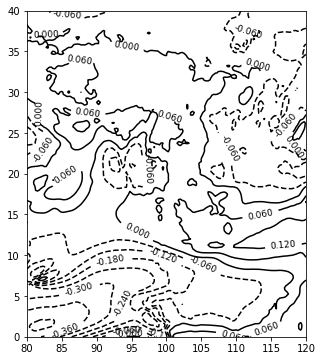

In [150]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, dyna*1000, 10, colors='k')  # Negative contours default to dashed.
ax.clabel(CS, fontsize=9, inline=True)

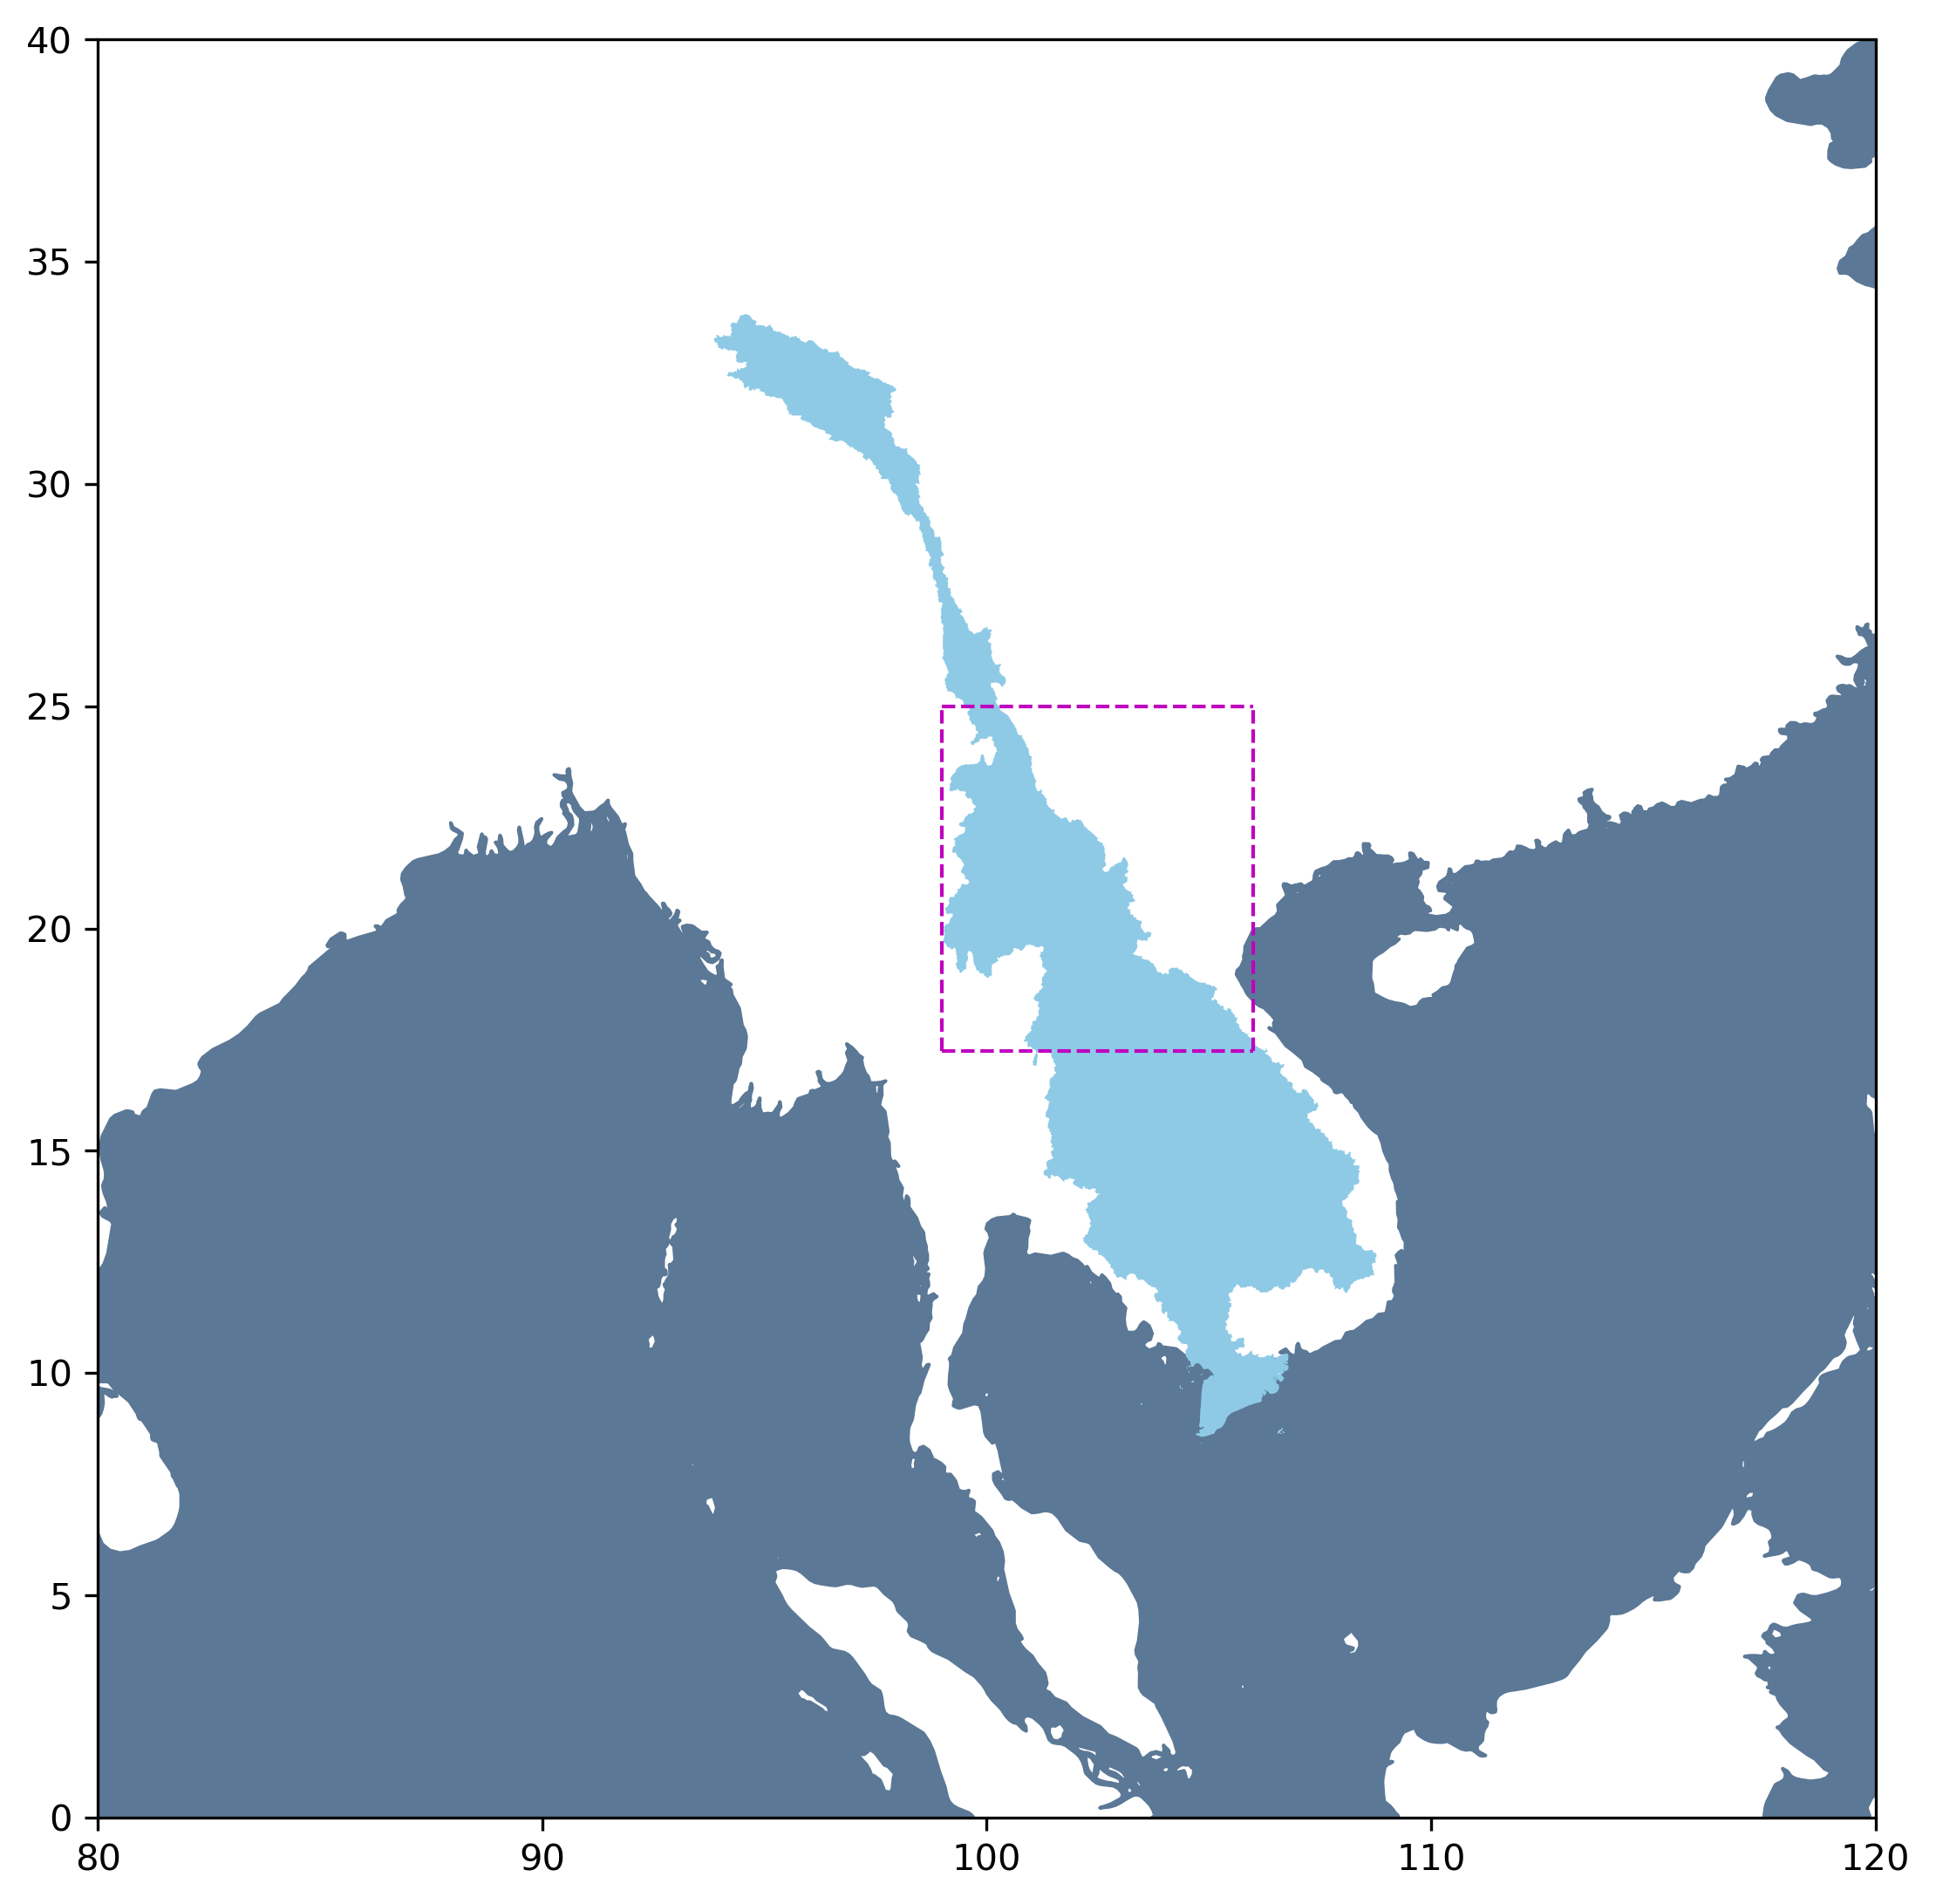

In [151]:

# Create and define the size of a figure object 
plt.figure(figsize=(20,9), dpi=300)

# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
 #                 linewidth=0.5, color='black', alpha=0.3,zorder=3)

ax.set_xticks(np.linspace(-180, 180, 37))

# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))

# set extent area
extent = [80, 120, 0, 38.25485]
ax.set_extent(extent)


levels1 = [-15,-5]
levels2 = [5,15]
CS1 = ax.contour(X, Y, dyna*10000, levels1, colors='#c9184a',
                 linewidths=(1,),linestyles='dotted')
CS2 = ax.contour(X, Y, dyna*10000, levels2, colors='#ff5d8f',
                 linewidths=(1,),linestyles='solid')
ax.clabel(CS1, inline=True, fontsize=15,fmt='%2.1f')
ax.clabel(CS2, inline=True, fontsize=15,fmt='%2.1f',)


# feature and mask

ax.add_feature(cfeature.OCEAN, facecolor='#5B7896')
ax = stack_shp(ax,shp ,facecolor='#8ecae6', edgecolor='none', linewidth=1, alpha=1,zorder=0)



ax.plot([99,99], [17.25,25], '--',color='m',lw=1, transform=ccrs.PlateCarree())
ax.plot([106,106], [17.25,25], '--',color='m',lw=1, transform=ccrs.PlateCarree())
ax.plot([99,106], [17.25,17.25], '--', color='m',lw=1, transform=ccrs.PlateCarree())
ax.plot([99,106], [25,25], '--',color='m',lw=1, transform=ccrs.PlateCarree())
#plt.savefig('basemap.pdf')

plt.show()

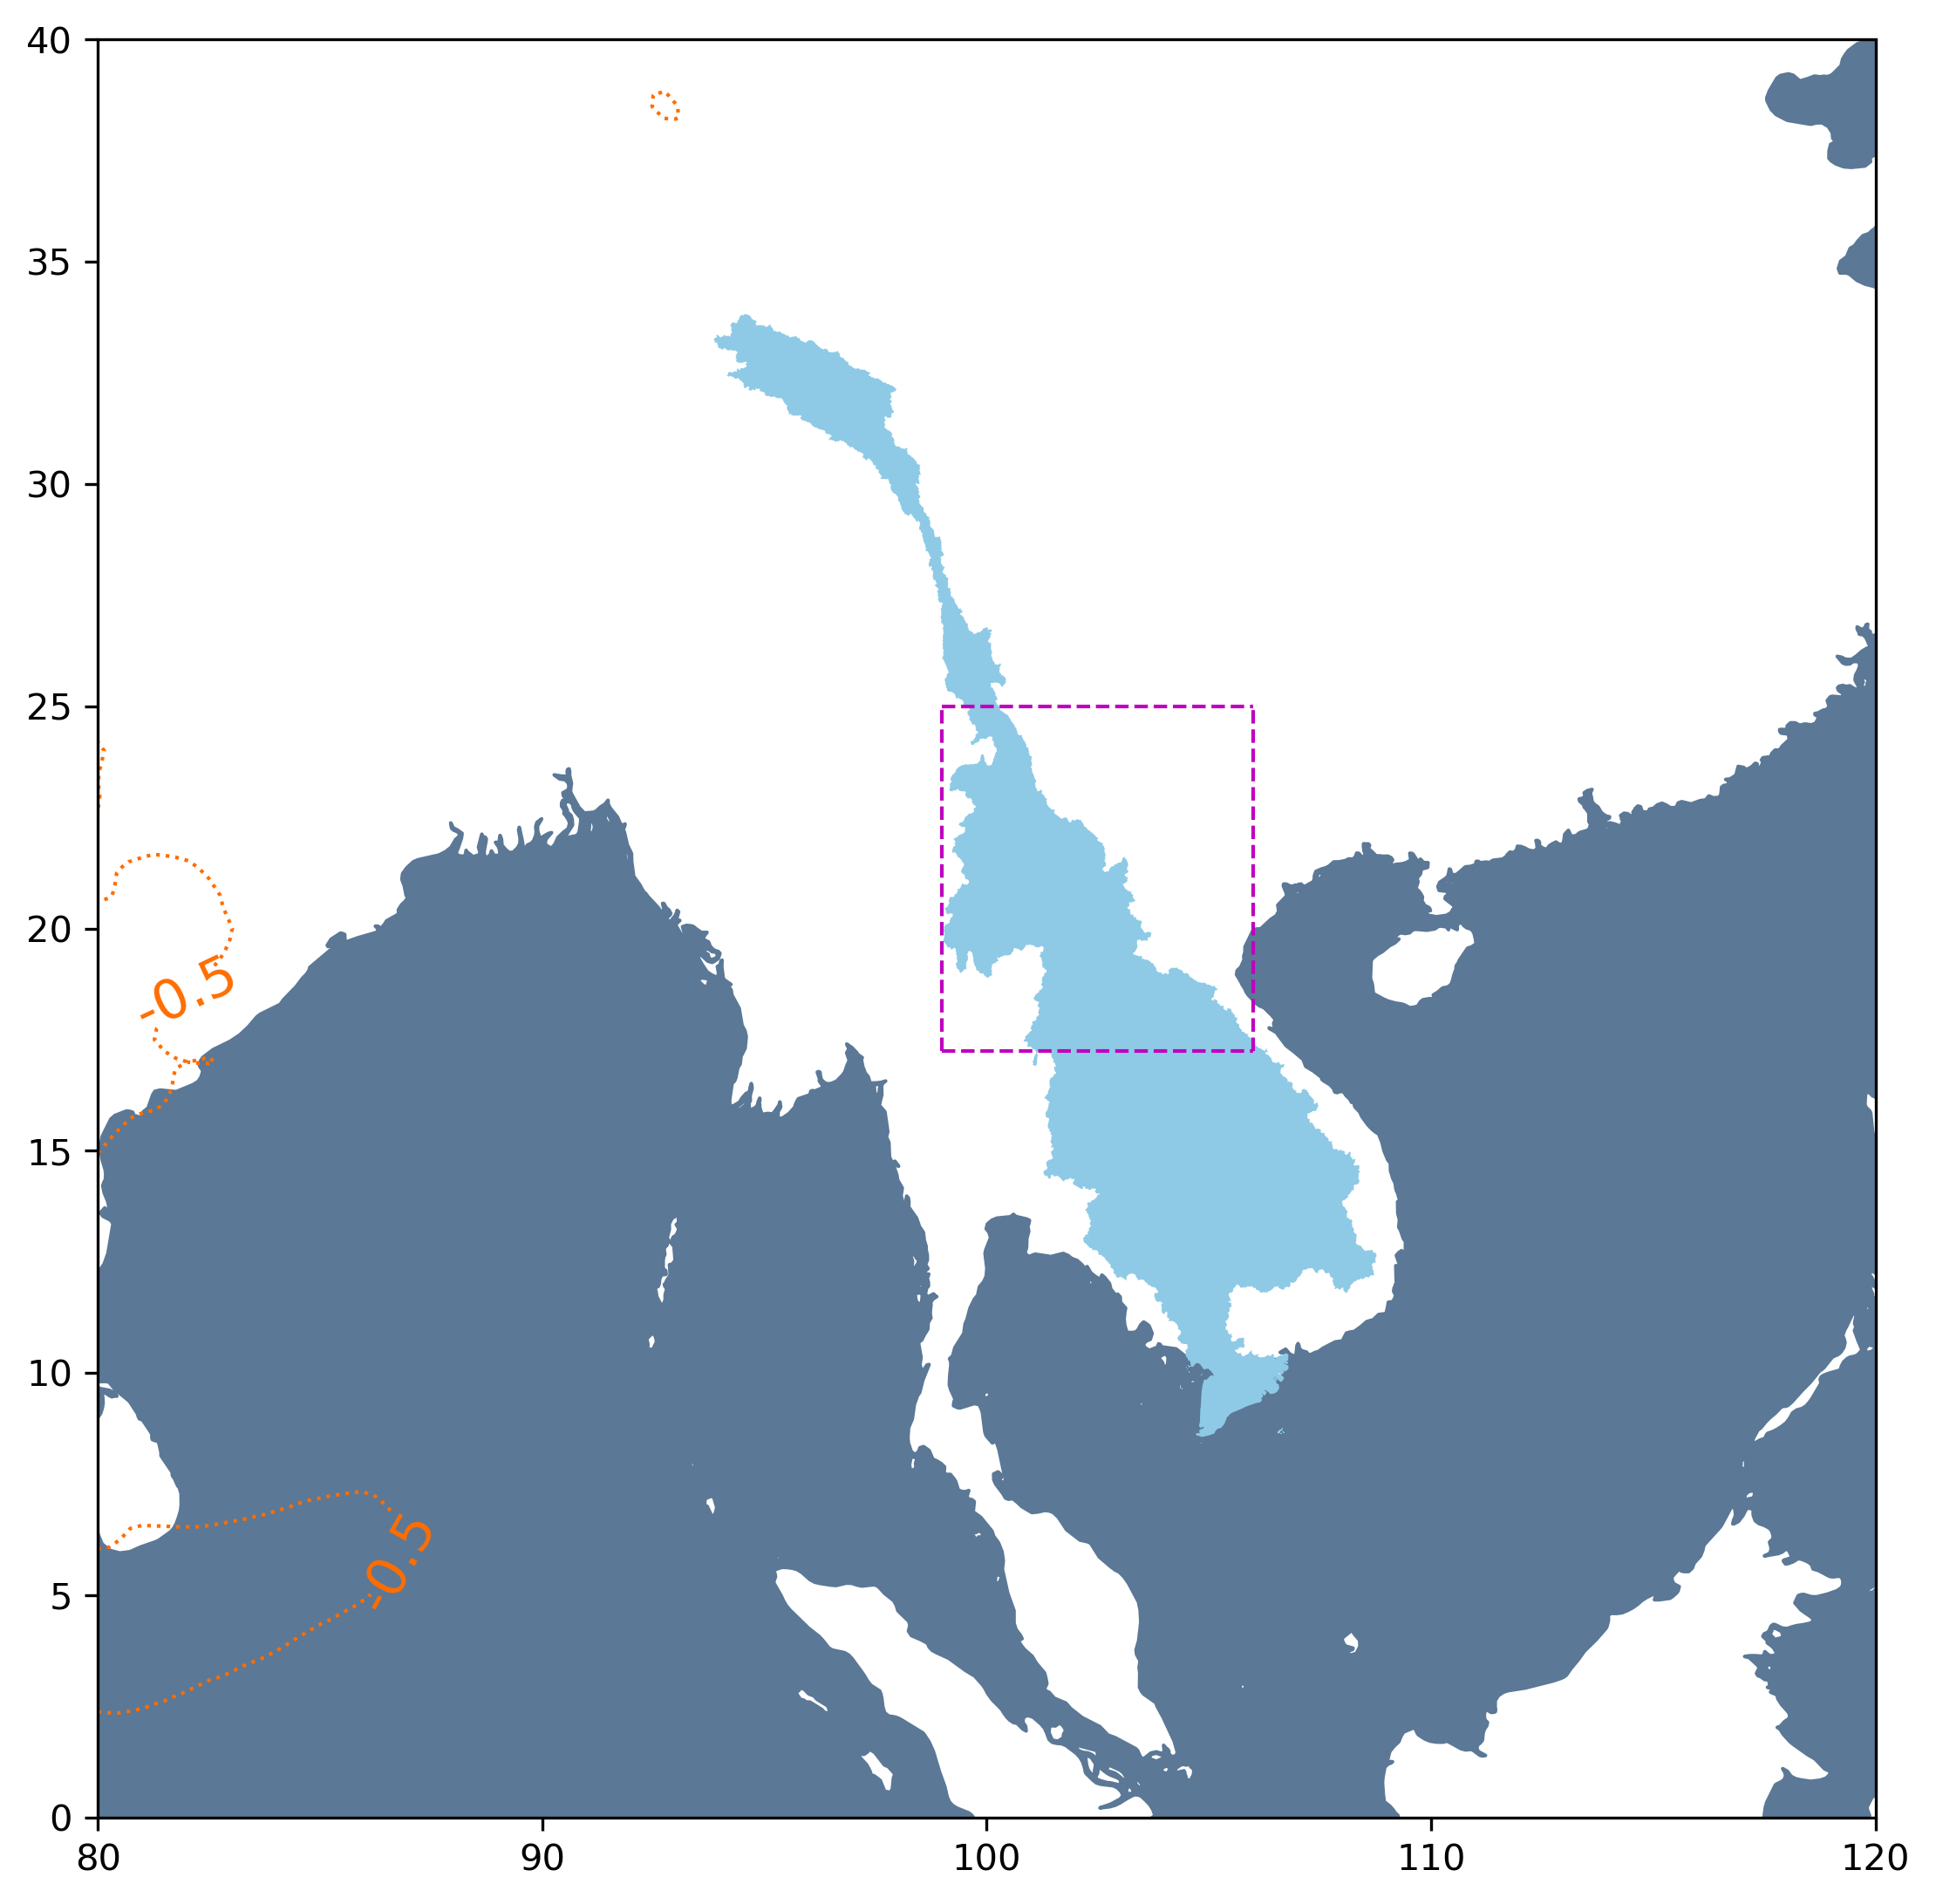

In [152]:

# Create and define the size of a figure object 
plt.figure(figsize=(20,9), dpi=300)

# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
 #                 linewidth=0.5, color='black', alpha=0.3,zorder=3)

ax.set_xticks(np.linspace(-180, 180, 37))

# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))

# set extent area
extent = [80, 120, 0, 38.25485]
ax.set_extent(extent)



levels1 = [-2, -0.5]
levels2 = [0.5, 2]
CS1 = ax.contour(X, Y, ther*10000, levels1, colors='#ff6d00',
                 linewidths=(1,),linestyles='dotted')
CS2 = ax.contour(X, Y, ther*10000, levels2, colors='#ff9e00',
                 linewidths=(1,),linestyles='solid')
ax.clabel(CS1, inline=True, fontsize=15,fmt='%2.1f')
ax.clabel(CS2, inline=True, fontsize=15,fmt='%2.1f',)



# feature and mask

ax.add_feature(cfeature.OCEAN, facecolor='#5B7896')
ax = stack_shp(ax,shp ,facecolor='#8ecae6',edgecolor='none', linewidth=1, alpha=1,zorder=0)



ax.plot([99,99], [17.25,25], '--',color='m',lw=1, transform=ccrs.PlateCarree())
ax.plot([106,106], [17.25,25], '--',color='m',lw=1, transform=ccrs.PlateCarree())
ax.plot([99,106], [17.25,17.25], '--', color='m',lw=1, transform=ccrs.PlateCarree())
ax.plot([99,106], [25,25], '--',color='m',lw=1, transform=ccrs.PlateCarree())
#plt.savefig('basemap.pdf')

plt.show()

In [153]:
dy=np.array(dyna)
th=np.array(ther)

In [154]:
ds_19_dy = xr.Dataset({'dy': (['lat', 'lon'], dy)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude)})
ds_19_th = xr.Dataset({'th': (['lat', 'lon'], th)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude)})

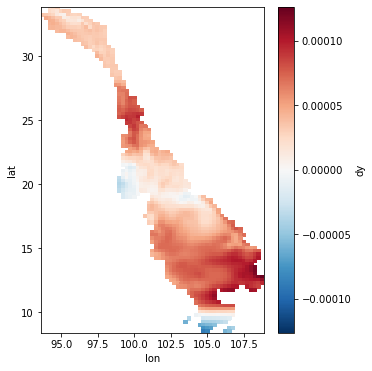

In [155]:
ds_bw_mk_dy,_ = ncslice(ds_19_dy,shp,18,index='LEGEND')
ds_bw_mk_dy.dy.plot(cmap='RdBu_r')
plt.rcParams["figure.figsize"] = (5,6)

dyy = ds_bw_mk_dy.sel(lat=ds_bw_mk_dy.lat[35:68])    # select study region



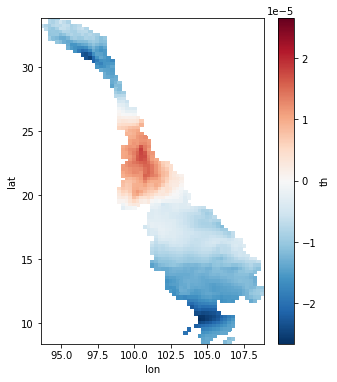

In [156]:
ds_bw_mk_th,_ = ncslice(ds_19_th,shp,18,index='LEGEND')
ds_bw_mk_th.th.plot(cmap='RdBu_r')
plt.rcParams["figure.figsize"] = (5,6)

thh = ds_bw_mk_th.sel(lat=ds_bw_mk_th.lat[35:68])    # select study region

In [157]:
listdy = [x for x in dyy.dy.values.reshape(2013,).tolist() if math.isnan(x) == False]
listth = [x for x in thh.th.values.reshape(2013,).tolist() if math.isnan(x) == False]

In [392]:
listth

[-5.7945757099016274e-05,
 -7.235348234020474e-05,
 -7.623374768900371e-05,
 -8.302429087862678e-05,
 -6.814431997820156e-05,
 -6.661782825836673e-05,
 -7.337571666755009e-05,
 -8.805168314931774e-05,
 -9.036836338363648e-05,
 -7.042119908647006e-05,
 -7.564049474402801e-05,
 -9.173443497554942e-05,
 -9.658629853568426e-05,
 -9.633922951681857e-05,
 -7.63554854991573e-05,
 -8.539680401202146e-05,
 -8.589168271012614e-05,
 -8.827488897568801e-05,
 -8.813768188567664e-05,
 -8.166983878268333e-05,
 -7.809820974214663e-05,
 -8.718871281455416e-05,
 -8.500730269126343e-05,
 -9.50142239963789e-05,
 -9.453944568506769e-05,
 -8.388660997160564e-05,
 -7.082468810553497e-05,
 -7.867750175150489e-05,
 -8.709047880535224e-05,
 -8.594096308664827e-05,
 -9.501818218874905e-05,
 -0.0001380733143359213,
 -0.00010632475649027096,
 -8.851265899872725e-05,
 -7.798146715552867e-05,
 -8.283231591158192e-05,
 -9.435641993138845e-05,
 -9.966838999476648e-05,
 -0.00011730882198558718,
 -0.00016072256414123142

In [400]:
u19.shape
v19
um
vm


(8, 161, 161)

In [401]:
ds_m

<xarray.Dataset>
Dimensions:    (latitude: 161, level: 8, longitude: 161)
Coordinates:
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * level      (level) int32 300 400 500 600 700 850 925 1000
Data variables:
    q          (level, latitude, longitude) float32 dask.array<chunksize=(8, 161, 161), meta=np.ndarray>
    u          (level, latitude, longitude) float32 dask.array<chunksize=(8, 161, 161), meta=np.ndarray>
    v          (level, latitude, longitude) float32 dask.array<chunksize=(8, 161, 161), meta=np.ndarray>

In [404]:
ds_m.latitude

<xarray.DataArray 'latitude' (latitude: 161)>
array([40.  , 39.75, 39.5 , 39.25, 39.  , 38.75, 38.5 , 38.25, 38.  , 37.75,
       37.5 , 37.25, 37.  , 36.75, 36.5 , 36.25, 36.  , 35.75, 35.5 , 35.25,
       35.  , 34.75, 34.5 , 34.25, 34.  , 33.75, 33.5 , 33.25, 33.  , 32.75,
       32.5 , 32.25, 32.  , 31.75, 31.5 , 31.25, 31.  , 30.75, 30.5 , 30.25,
       30.  , 29.75, 29.5 , 29.25, 29.  , 28.75, 28.5 , 28.25, 28.  , 27.75,
       27.5 , 27.25, 27.  , 26.75, 26.5 , 26.25, 26.  , 25.75, 25.5 , 25.25,
       25.  , 24.75, 24.5 , 24.25, 24.  , 23.75, 23.5 , 23.25, 23.  , 22.75,
       22.5 , 22.25, 22.  , 21.75, 21.5 , 21.25, 21.  , 20.75, 20.5 , 20.25,
       20.  , 19.75, 19.5 , 19.25, 19.  , 18.75, 18.5 , 18.25, 18.  , 17.75,
       17.5 , 17.25, 17.  , 16.75, 16.5 , 16.25, 16.  , 15.75, 15.5 , 15.25,
       15.  , 14.75, 14.5 , 14.25, 14.  , 13.75, 13.5 , 13.25, 13.  , 12.75,
       12.5 , 12.25, 12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25,
       10.  ,  9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,
        7.5 ,  7.25,  7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,
        5.  ,  4.75,  4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ,  2.75,
        2.5 ,  2.25,  2.  ,  1.75,  1.5 ,  1.25,  1.  ,  0.75,  0.5 ,  0.25,
        0.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [478]:
u19.mean()

2.028572

In [479]:
um.mean()

2.21436

In [15]:
ds_u199 = xr.Dataset({'u': (['level', 'lat','lon'], u19)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude),
                           'level':(['level'], ds_m.level)})
ds_umm = xr.Dataset({'u': (['level', 'lat','lon'], um)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude),
                           'level':(['level'], ds_m.level)})

ds_v199 = xr.Dataset({'v': (['level', 'lat','lon'], v19)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude),
                           'level':(['level'], ds_m.level)})
ds_vmm = xr.Dataset({'v': (['level', 'lat','lon'], vm)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude),
                           'level':(['level'], ds_m.level)})


NameError: name 'u19' is not defined

In [530]:
#BOB region CEF

v19bob = ds_v199.sel(lat=ds_v199.lat[110:131],
                     lon=ds_v199.lon[10:51]).v.values
u19bob = ds_u199.sel(lat=ds_u199.lat[110:131],
                     lon=ds_u199.lon[10:51]).u.values

vmmbob = ds_vmm.sel(lat=ds_vmm.lat[110:131],
                     lon=ds_vmm.lon[10:51]).v.values
ummbob = ds_umm.sel(lat=ds_umm.lat[110:131],
                     lon=ds_umm.lon[10:51]).u.values

v19b = np.nanmean(v19bob,axis=(1,2))
v19m = np.nanmean(vmmbob,axis=(1,2))

u19b = np.nanmean(u19bob,axis=(1,2))
u19m = np.nanmean(ummbob,axis=(1,2))

In [546]:
#SCS region CEF
v19bob = ds_v199.sel(lat=ds_v199.lat[110:131],
                     lon=ds_v199.lon[90:121]).v.values
u19bob = ds_u199.sel(lat=ds_u199.lat[110:131],
                     lon=ds_u199.lon[90:121]).u.values

vmmbob = ds_vmm.sel(lat=ds_vmm.lat[110:131],
                     lon=ds_vmm.lon[90:121]).v.values
ummbob = ds_umm.sel(lat=ds_umm.lat[110:131],
                     lon=ds_umm.lon[90:121]).u.values

v19b = np.nanmean(v19bob,axis=(1,2))
v19m = np.nanmean(vmmbob,axis=(1,2))

u19b = np.nanmean(u19bob,axis=(1,2))
u19m = np.nanmean(ummbob,axis=(1,2))

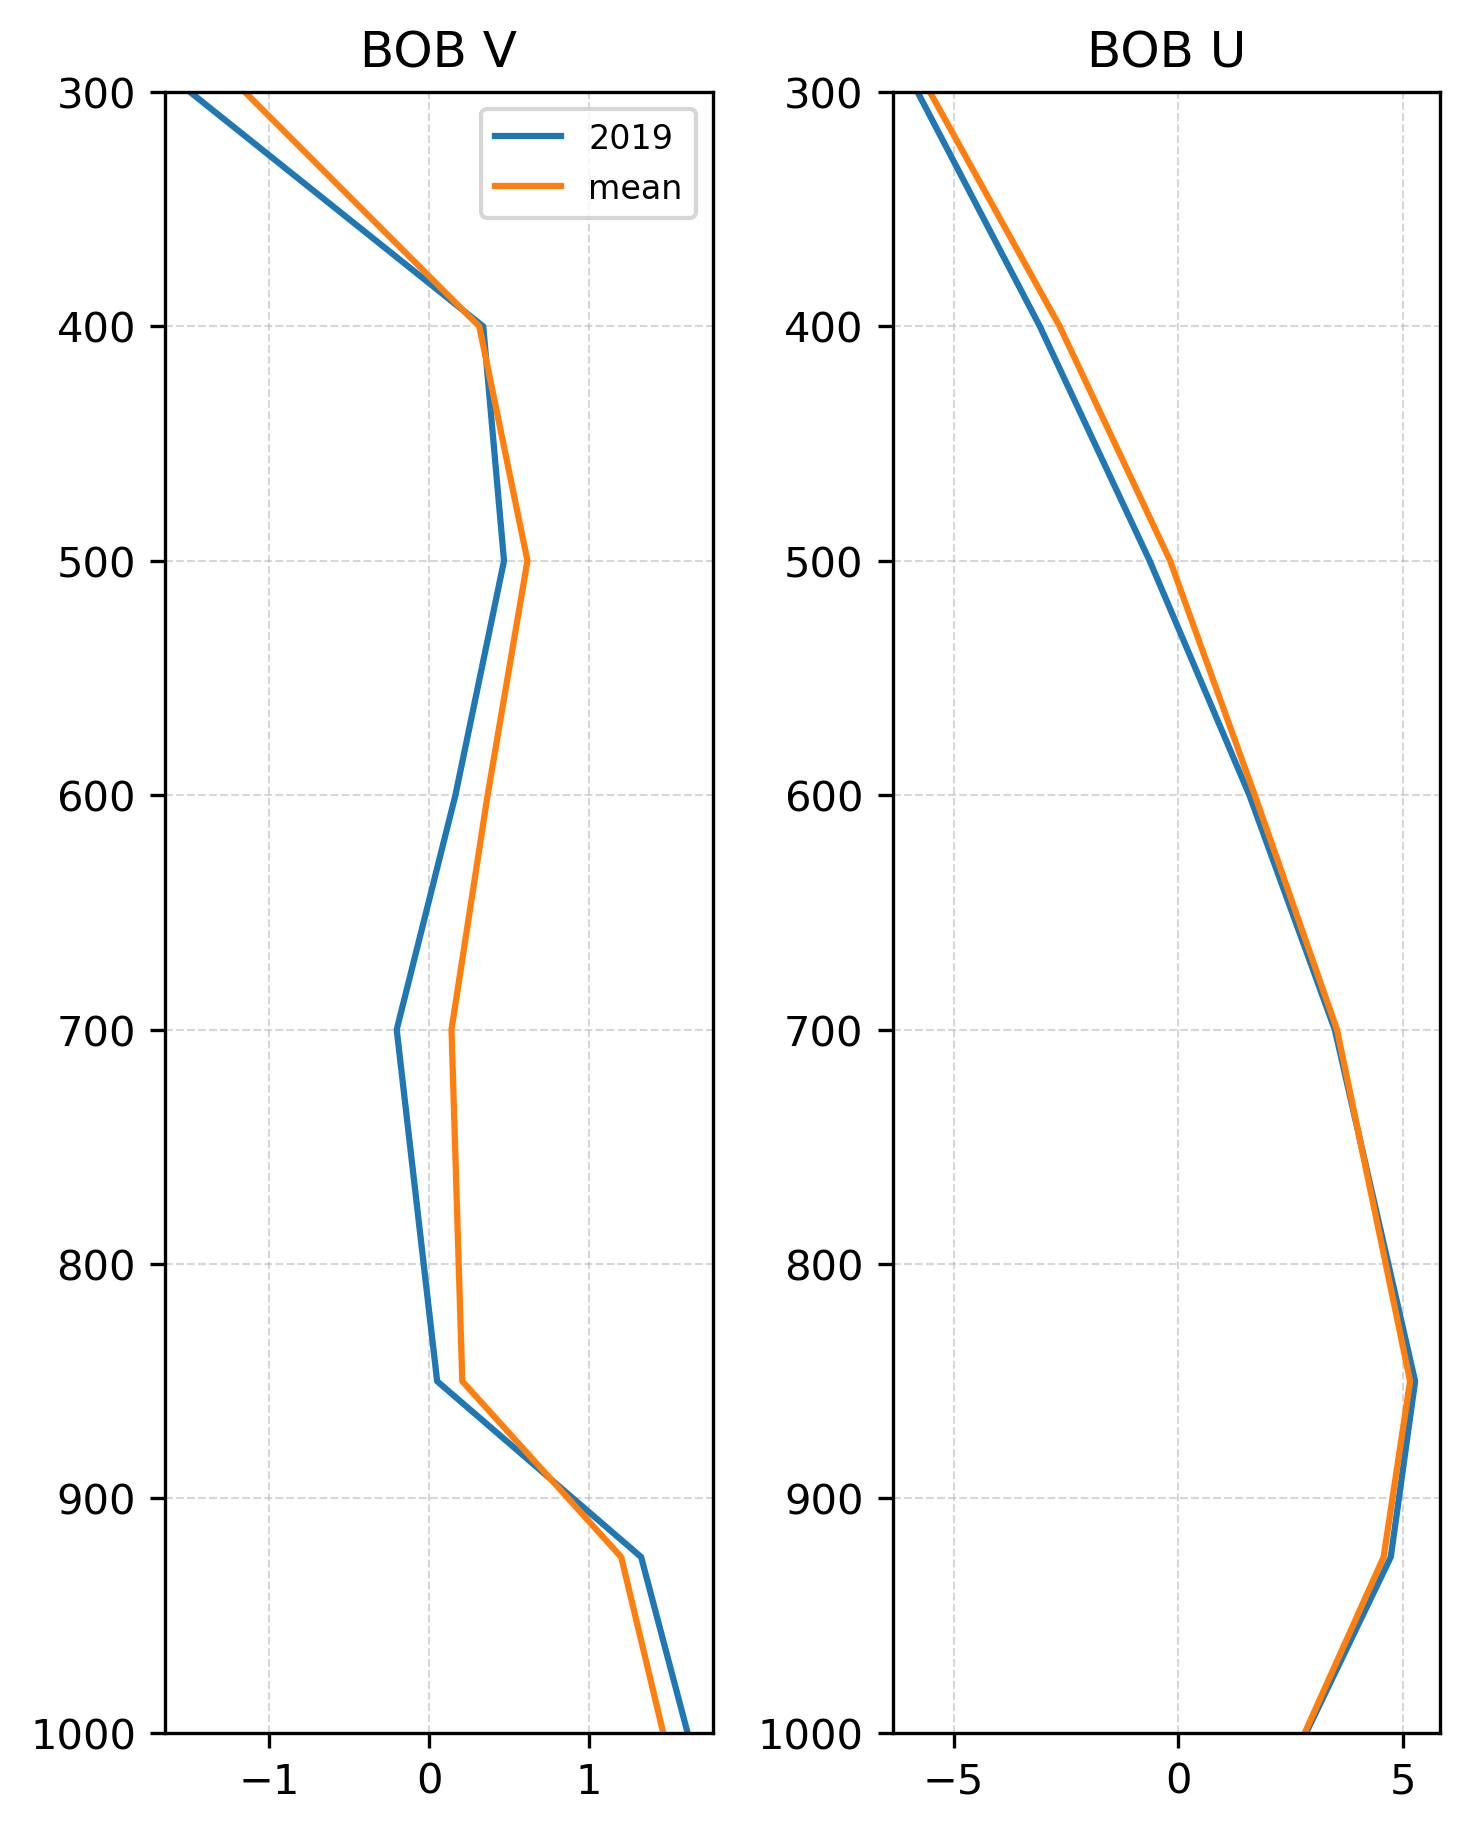

In [547]:
fig, axs = plt.subplots(1, 2,dpi=300)

axs[0].plot( v19b,ds_m.level,label='2019')
axs[0].plot( v19m,ds_m.level,label='mean')
axs[1].plot( u19b,ds_m.level)
axs[1].plot( u19m,ds_m.level)

plt.tight_layout()
axs[0].legend(loc='best',fontsize=8)
axs[0].set_title('V wind ano',fontsize = 12)
axs[1].set_title('U wind ano',fontsize = 12)

axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.5)

axs[0].set_ylim(1000,300)
axs[1].set_ylim(1000,300)
axs[0].set_title('BOB V')
axs[1].set_title('BOB U')
plt.savefig('SCSCEF.pdf')